# Part 1: Descriptive Statistics

## 1. Defining the Question

### a) Specifying the Question

> How can we determine individuals most likely to have or use a bank account so as to provide indication of state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda and also provide insights into demographic factors that have led to these outcomes?

### b) Defining the Metric for Success

> The end goal of this analysis is answer the question by to carry out the following processes:

i). Data cleaning: Find and deal with outliers, anomalies, and missing data within the dataset.

ii). Data exploration:Perform univariate, bivariate and multivariate analysis and record observations.

iii). Identifying  a solution through PCA, factor Analysis and Linear Discriminant Analysis.

### c) Understanding the context 

> Financial inclusion is a big problem in Africa. Having a bank account is regarded as one of the indicators of this and getting one is still an obstacle for many with for example only 13.9% of the adult popoulation in Kenya, Rwanda, Uganda and Tanzania have access or are able to use one.


### d) Recording the Experimental Design

> First data cleaning then Univariate, bivariate and multivariate summaries and identifying a solution then challenging the solution.

### e) Data Relevance

> Majority of the data had categorical variables which made it difficult to analyze the data especially in the bivariate and multivariate analysis.

## 2. Importing the relevant libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 3. Reading the Data

In [ ]:
# Loading the Data from the source i.e. csv
# Dataset url = /content/Financial Dataset - 1.csv

Financial_dataset= pd.read_csv('/content/Financial Dataset - 1.csv')

Financial_dataset


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


## 4. Checking the Data

In [ ]:
# Determining the no. of records in our dataset

Financial_dataset.shape

(23524, 13)

In [ ]:
# Previewing the top of our dataset

Financial_dataset.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# Previewing the bottom of our dataset

Financial_dataset.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
# Checking whether each column has an appropriate datatype

Financial_dataset.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

## 5. External Data Source Validation

### a.Validation

In [ ]:
# 1). validation of data  with at least one external source which in this case we will use the Kenyan data.

#According to FSD Kenya. (2019) 83% of the population has is financially included formally.
#This in terms of our data can be regarded as having a bank account or cell phone access(mobile banking etc.), we will use the cell phone data.


Financial_dataset_1=Financial_dataset['Cell Phone Access'].value_counts().rename_axis('Cell Phone Access').reset_index(name='counts')
Financial_dataset_1

#Values of value count output
 
Yes=17449
No=6064
Total=(Yes + No)

(Yes/Total)*100

#Output is 74% in the sample which is close to the 83% described in the data.


74.2100114830094

## 6. Tidying the Dataset

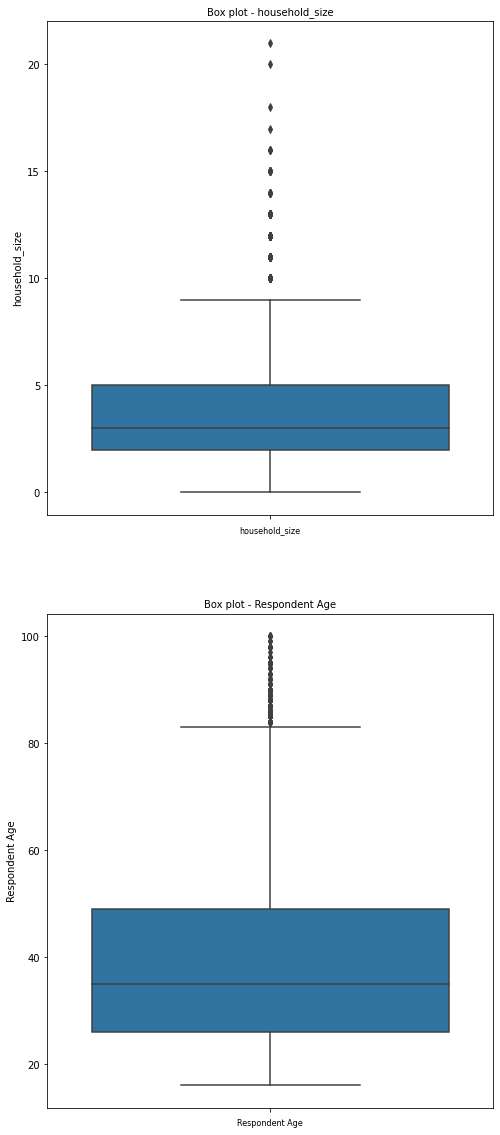

In [ ]:
# Checking for Outliers
#plotting a box plot to detect outliers for numerical variables
#columns being plotted are household size and age.

Financial_dataset_new= Financial_dataset.drop(['country','year','uniqueid','Has a Bank account','Type of Location','Cell Phone Access','gender_of_respondent','The relathip with head','marital_status','Level of Educuation','Type of Job'], axis=1)

col_names = ['household_size','Respondent Age']

fig, ax = plt.subplots(len(col_names), figsize=(8,20))

for i, col_val in enumerate(col_names):

  sns.boxplot(y=Financial_dataset_new[col_val], ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

#Researcher has chosen outliers will remain

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64


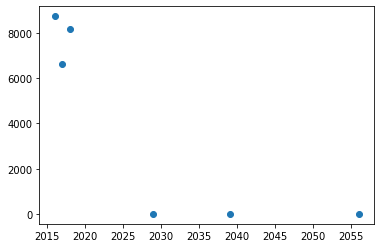

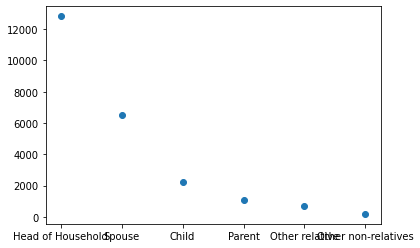

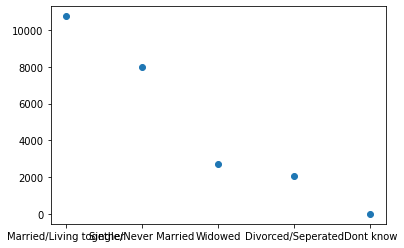

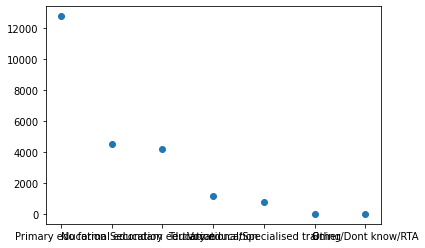

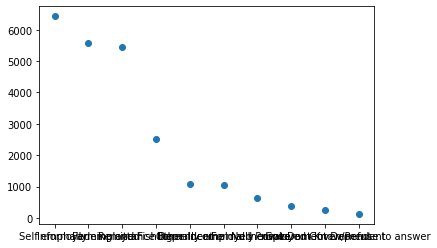

In [ ]:
#plotting a scatter plot to detect outliers for categorical variables

#First identify unique values
print(Financial_dataset.nunique())

#Conclusion:No need to check outliers for Country, has a bank account, type of location, cell phone access, gender of respondents since they are within the required numbers for the categories.
#Also for unique_id since it's unique for every input

#1). Year
Outliers_year=Financial_dataset['year'].value_counts().rename_axis('year').reset_index(name='counts')
plt.scatter(Outliers_year['year'],Outliers_year['counts'])
plt.show()
#There are 3 outliers for year which is erronously input data which will be cleaned by filling with the years sampled were taken in the various countries.

#2). Relationship with head
Outliers_relation=Financial_dataset['The relathip with head'].value_counts().rename_axis('relationship').reset_index(name='counts')
plt.scatter(Outliers_relation['relationship'],Outliers_relation['counts'])
plt.show()
#no outliers

#3). Marital status
Outliers_marital=Financial_dataset['marital_status'].value_counts().rename_axis('Status').reset_index(name='counts')
plt.scatter(Outliers_marital['Status'],Outliers_marital['counts'])
plt.show()
#no outliers

#4). Level of Education
Outliers_education=Financial_dataset['Level of Educuation'].value_counts().rename_axis('Education').reset_index(name='counts')
Outliers_education
plt.scatter(Outliers_education['Education'],Outliers_education['counts'])
plt.show()
#There is 1 outlier where a level of education is listed as 6,which is not listed in variable information document provided, all values with it will be listed as don't know.

#5). Type of job
Outliers_job=Financial_dataset['Type of Job'].value_counts().rename_axis('Job').reset_index(name='counts')
Outliers_job
plt.scatter(Outliers_job['Job'],Outliers_job['counts'])
plt.show()
#no outliers



In [ ]:
Outliers_education=Financial_dataset['Level of Educuation'].value_counts().rename_axis('Education').reset_index(name='counts')
Outliers_education

,Education,counts
0,Primary education,12775
1,No formal education,4506
2,Secondary education,4220
3,Tertiary education,1156
4,Vocational/Specialised training,803
5,6,27
6,Other/Dont know/RTA,8


In [ ]:
#Checking for Anomalies
#Using IQR

#household size
#Find IQR then lower and higher bound
q1_household_size = Financial_dataset['household_size'].quantile(.25)
q3_household_size = Financial_dataset['household_size'].quantile(.75)
iqr_household_size = q3_household_size - q1_household_size
iqr_household_size

l_bound = q1_household_size - (1.5 * iqr_household_size)
u_bound = q3_household_size + (1.5 * iqr_household_size)

print(l_bound,u_bound)

#Anything household size below 2.5 and above 9.5 is an anomaly

-2.5 9.5


In [ ]:
#Respondent age
#Find IQR then lower and higher bound

q1_respondent_age = Financial_dataset['Respondent Age'].quantile(.25)
q3_respondent_age = Financial_dataset['Respondent Age'].quantile(.75)
iqr_respondent_age = q3_respondent_age - q1_respondent_age
iqr_respondent_age

lower_bound = q1_household_size - (1.5 * iqr_respondent_age)
upper_bound = q3_household_size + (1.5 * iqr_respondent_age)

print(lower_bound,upper_bound)

#Anything respondent aged below 32.5 and above 39.5 is an anomaly

-32.5 39.5


In [ ]:
# Identifying there are Missing Data.
#Returns true meaning there are missing values/null values
Financial_dataset.isnull().values.any()

True

In [ ]:
# Identifying the missing Data.
#use df.info()

Financial_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [ ]:
# Identifying the number of Missing Data per column
#use isnull().sum() function to get summary of missing values

Financial_dataset.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
# Dealing with the Missing Data
#Solution: Delete all rows with missing data since they will interfere with findings if filled in and there is no other data source that we can fill in the missing values.

Financial_dataset_clean=Financial_dataset.dropna(how='any')

Financial_dataset_clean


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [ ]:
# More data cleaning procedures
#confirming there are no null values in data
Financial_dataset_clean.info()

#clean outliers detected in year column by filling in with actual values
#check unique values are still the same as previously before missing data was removed.
print(Financial_dataset_clean.nunique())

#replace level of education is listed as 6 to don't know

Financial_dataset_clean['Level of Educuation'].replace([6],"Other/Dont know/RTA")
print(Financial_dataset_clean.nunique())


#replace year on all 3 erronously input values in year
#value 1: index 213 from 2029 to 2018


Financial_dataset_final = Financial_dataset_clean.replace([2029],2018)
Financial_dataset_final



<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23343 non-null  object 
 1   year                    23343 non-null  int64  
 2   uniqueid                23343 non-null  object 
 3   Has a Bank account      23343 non-null  object 
 4   Type of Location        23343 non-null  object 
 5   Cell Phone Access       23343 non-null  object 
 6   household_size          23343 non-null  float64
 7   Respondent Age          23343 non-null  float64
 8   gender_of_respondent    23343 non-null  object 
 9   The relathip with head  23343 non-null  object 
 10  marital_status          23343 non-null  object 
 11  Level of Educuation     23343 non-null  object 
 12  Type of Job             23343 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.5+ MB
country                      4
ye

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [ ]:
#value 2: index 308 from 2056 to 2018

Financial_dataset_final_1 = Financial_dataset_clean.replace([2056],2018)
Financial_dataset_final_1

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [ ]:
#value 3: index 7014 from 2039 to 2016

Financial_dataset_final_2 = Financial_dataset_clean.replace([2039],2016)
Financial_dataset_final_2

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


## 7. Univariate Exploratory Analysis

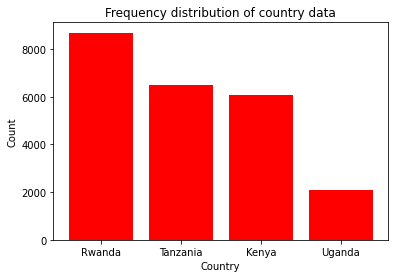

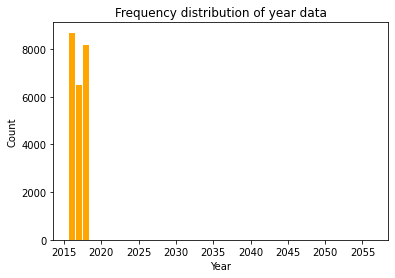

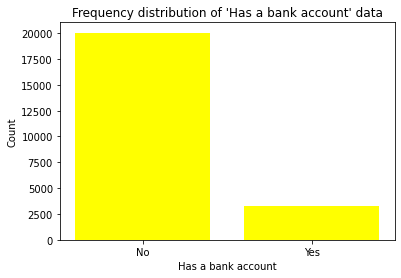

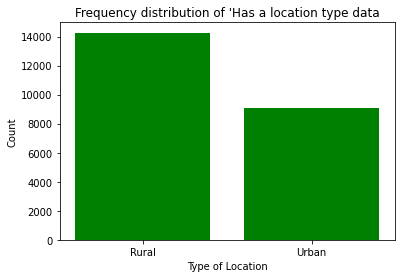

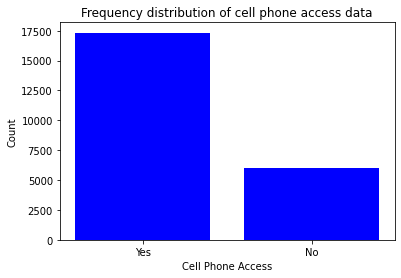

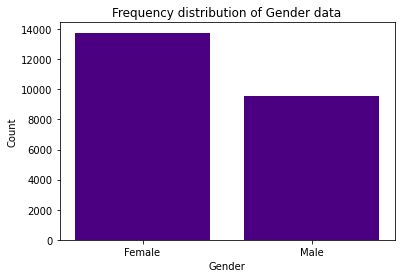

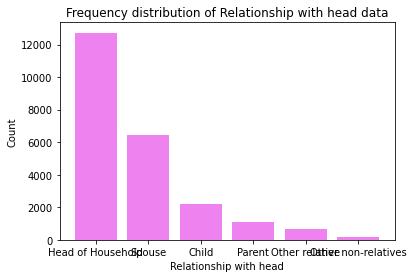

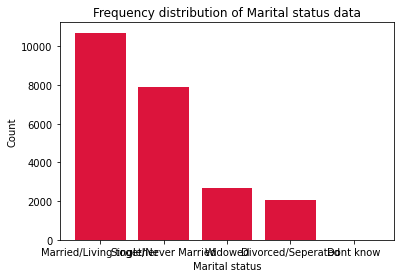

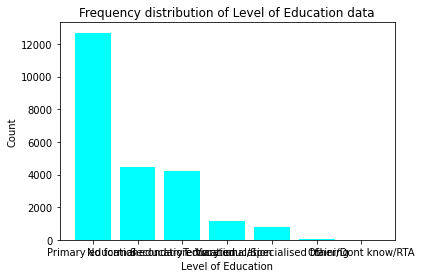

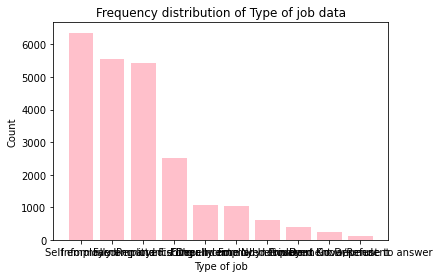

In [ ]:
# Ploting the univariate summaries and recording our observations
#First for categorical variables in the data

#1). Country

Financial_dataset_clean_1=Financial_dataset_clean['country'].value_counts().rename_axis('country').reset_index(name='counts')
Financial_dataset_clean_1

plt.bar(Financial_dataset_clean_1['country'],Financial_dataset_clean_1['counts'], color='red')
plt.title('Frequency distribution of country data')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


#2). Year
Financial_dataset_clean_2=Financial_dataset_clean['year'].value_counts().rename_axis('year').reset_index(name='counts')
Financial_dataset_clean_2

plt.bar(Financial_dataset_clean_2['year'],Financial_dataset_clean_2['counts'], color='orange')
plt.title('Frequency distribution of year data')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


#3). Has a bank account
Financial_dataset_clean_3=Financial_dataset_clean['Has a Bank account'].value_counts().rename_axis('Has a Bank account').reset_index(name='counts')
Financial_dataset_clean_3

plt.bar(Financial_dataset_clean_3['Has a Bank account'],Financial_dataset_clean_3['counts'], color='yellow')
plt.title("Frequency distribution of 'Has a bank account' data")
plt.xlabel('Has a bank account')
plt.ylabel('Count')
plt.show()


#4). Type of location
Financial_dataset_clean_4=Financial_dataset_clean['Type of Location'].value_counts().rename_axis('Location').reset_index(name='counts')
Financial_dataset_clean_4

plt.bar(Financial_dataset_clean_4['Location'],Financial_dataset_clean_4['counts'], color='green')
plt.title("Frequency distribution of 'Has a location type data")
plt.xlabel('Type of Location')
plt.ylabel('Count')
plt.show()


#5). Cell phone access
Financial_dataset_clean_5=Financial_dataset_clean['Cell Phone Access'].value_counts().rename_axis('Cell Phone Access').reset_index(name='counts')
Financial_dataset_clean_5

plt.bar(Financial_dataset_clean_5['Cell Phone Access'],Financial_dataset_clean_5['counts'], color='blue')
plt.title("Frequency distribution of cell phone access data")
plt.xlabel('Cell Phone Access')
plt.ylabel('Count')
plt.show()


#6). Gender
Financial_dataset_clean_6=Financial_dataset_clean['gender_of_respondent'].value_counts().rename_axis('Gender').reset_index(name='counts')
Financial_dataset_clean_6

plt.bar(Financial_dataset_clean_6['Gender'],Financial_dataset_clean_6['counts'], color='indigo')
plt.title("Frequency distribution of Gender data")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


#7). Relationship with head
Financial_dataset_clean_7=Financial_dataset_clean['The relathip with head'].value_counts().rename_axis('Relationship with head').reset_index(name='counts')
Financial_dataset_clean_7

plt.bar(Financial_dataset_clean_7['Relationship with head'],Financial_dataset_clean_7['counts'], color='violet')
plt.title("Frequency distribution of Relationship with head data")
plt.xlabel('Relationship with head')
plt.ylabel('Count')
plt.show()


#8). Marital status
Financial_dataset_clean_7=Financial_dataset_clean['marital_status'].value_counts().rename_axis('Marital status').reset_index(name='counts')
Financial_dataset_clean_7

plt.bar(Financial_dataset_clean_7['Marital status'],Financial_dataset_clean_7['counts'], color='crimson')
plt.title("Frequency distribution of Marital status data")
plt.xlabel('Marital status')
plt.ylabel('Count')
plt.show()


#9). Level of Education
Financial_dataset_clean_8=Financial_dataset_clean['Level of Educuation'].value_counts().rename_axis('Level of Education').reset_index(name='counts')
Financial_dataset_clean_8

plt.bar(Financial_dataset_clean_8['Level of Education'],Financial_dataset_clean_8['counts'], color='cyan')
plt.title("Frequency distribution of Level of Education data")
plt.xlabel('Level of Education')
plt.ylabel('Count')
plt.show()


#10). Type of job
Financial_dataset_clean_9=Financial_dataset_clean['Type of Job'].value_counts().rename_axis('Type of job').reset_index(name='counts')
Financial_dataset_clean_9

plt.bar(Financial_dataset_clean_9['Type of job'],Financial_dataset_clean_9['counts'], color='pink')
plt.title("Frequency distribution of Type of job data")
plt.xlabel('Type of job')
plt.ylabel('Count')
plt.show()


In [ ]:
#Observations:
#Country with the most data is Rwanda
#A large majority of the population do not have a bank account.
#A large majority of the population have a cell phone. 
#A large majority of the population live in rural areas
#A large majority of the population is female.
#Most of those interviewed are the heads of the households.
#A large majority of the population has only reached primary level of education.
#A large majority of the population are married.
#Most are self-employed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


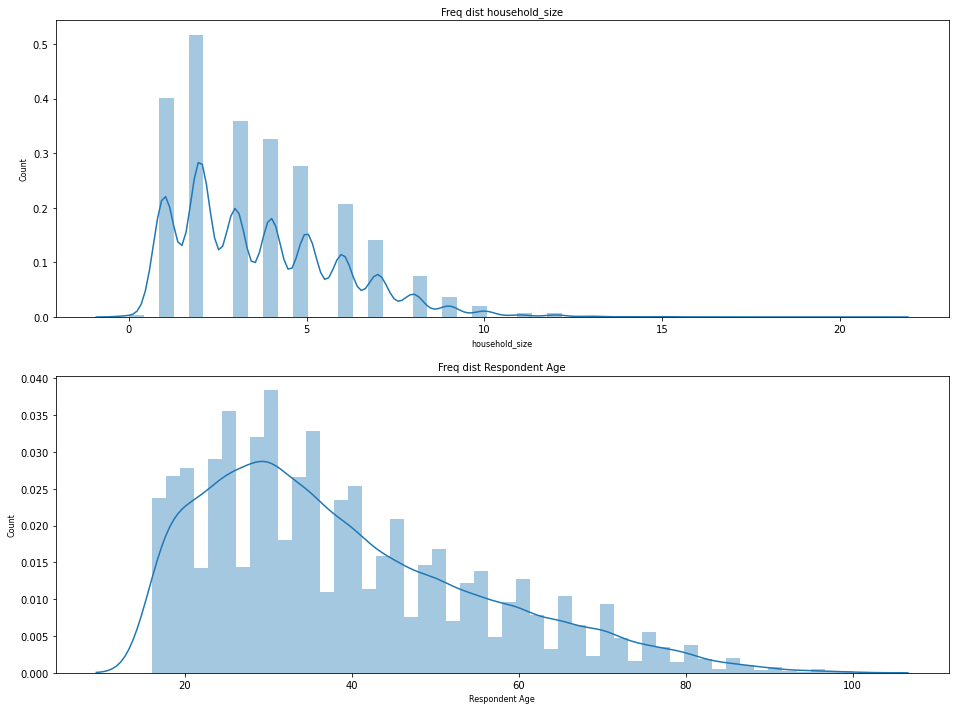

In [ ]:
# Ploting the univariate summaries and recording our observations
#Second for numerical variables in the data which are household size and respondent's age


col_names = ['household_size', 'Respondent Age']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):
        
    sns.distplot(Financial_dataset_clean[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.show()

In [ ]:
#Observations:

#The age data is skewed to the left meaning majority of the respondent's ages lie in the lower range of values.
#Majority of the household sizes are within the lower range and most of the distribution is a variation with household sizes peaking at certain values then immediately reducing at the next value.

## 8. Bivariate Exploratory Analysis

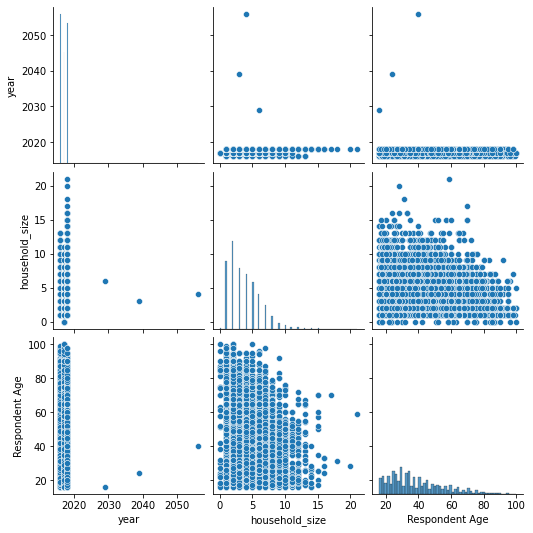

In [ ]:
# Ploting the bivariate summaries and recording our observations

sns.pairplot(Financial_dataset_clean)
plt.show()

In [ ]:
#Observation:
#None of the values are correlated in either a negative or positive way in this dataset.

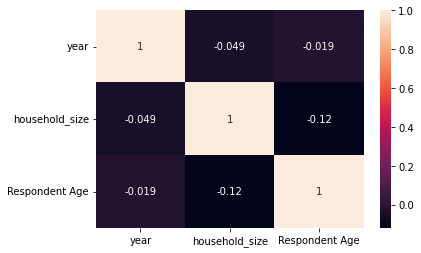

In [ ]:
sns.heatmap(Financial_dataset_clean.corr(),annot=True)
plt.show()

In [ ]:
#Observation:
#All different variables have a weak negative correlation to each other.

## 9. Multivariate Exploratory Analysis

In [ ]:
#import libraries that will be used.
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML

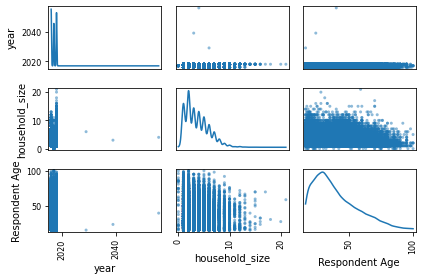

In [ ]:
#Plotting a scatter matrix for the numerical data
pd.plotting.scatter_matrix(Financial_dataset_clean, diagonal="kde")
plt.tight_layout()
plt.show()

In [ ]:
#Observation: None of the variables are correlated.

## 10. Implementing the Solution

In [ ]:
#Implementing the Solution
#Principal component Analysis

#step 1: standardize the data with scale()





## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

### a). Did we have the right data?

The data given was primarily categorical for most variables which made it difficult to represent especially in the bivariate analysis, so more numerical data would have been better.

# b). Do we need other data to answer our question?

Yes, we need majority of the categorical data in the data set to be made numerical so it can be easily quantified for analysis to take place.

# c). Did we have the right question?

The question is right but the data has not made it easy to answer it.